In [3]:
import numpy as np
import pandas as pd

col_names = ['survived', 'pclass', 'sex', 'age', 'siblings_spouse', 'parents_children', 'fare']
data = pd.read_csv("titanic_data.csv", skiprows=1, header=None, names=col_names)

data.head(5)

,survived,pclass,sex,age,siblings_spouse,parents_children,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


## Problem 5.1

In [4]:
from collections import Counter

class KNN:
    def __init__(self, k=5):
        self.k = k

    def set_k(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        if len(k_indices) == 0:  # If no neighbors found, return a default value or handle as needed
            return None
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [5]:
data_np = data.to_numpy()

X = data_np[:, 1:]  # Features
y = data_np[:, 0]   # Labels

# Test data
test_features = np.array([
    [3, 0, 25.0, 0, 0, 7.05],
    [3, 0, 80.0, 0, 0, 25.0],
    [3, 0, 61.0, 1, 1, 25.0],
    [1, 1, 17.0, 2, 2, 30.0]
])

# Initialize and set training values in KNN model
knn = KNN(k = 5)
knn.fit(X, y)

# Predictions
predictions = knn.predict(test_features)
print("Predictions:")
for i, pred in enumerate(predictions):
    print(f"Sample {i + 1}:", test_features[i])
    print("Result: Survived" if pred == 1 else "Result: Died")

Predictions:
Sample 1: [ 3.    0.   25.    0.    0.    7.05]
Result: Died
Sample 2: [ 3.  0. 80.  0.  0. 25.]
Result: Died
Sample 3: [ 3.  0. 61.  1.  1. 25.]
Result: Died
Sample 4: [ 1.  1. 17.  2.  2. 30.]
Result: Survived


In [6]:
survived_totals = []
for i in range(6):
    knn.set_k(i + 1)
    predictions = knn.predict(test_features)
    survived_totals.append(np.sum(predictions))
    print("Predictions:", predictions)

Predictions: [0. 1. 0. 1.]
Predictions: [0. 1. 0. 1.]
Predictions: [0. 0. 0. 1.]
Predictions: [0. 0. 0. 1.]
Predictions: [0. 0. 0. 1.]
Predictions: [0. 0. 0. 1.]


['k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'k=6']
[2.0, 2.0, 1.0, 1.0, 1.0, 1.0]


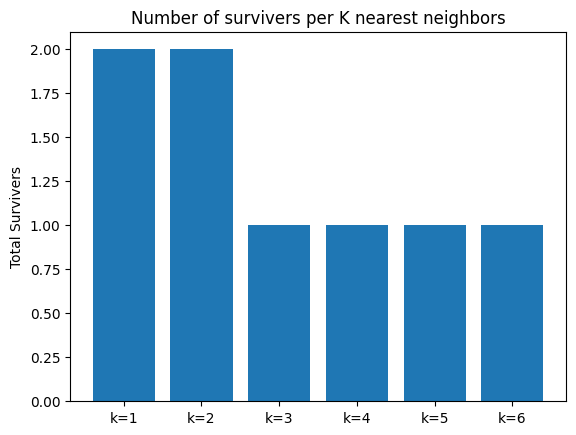

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_labels = [f"k={i + 1}" for i in range(len(survived_totals))]
print(x_labels)
print(survived_totals)
ax.bar(x_labels, survived_totals)

ax.set_ylabel('Total Survivers')
ax.set_title('Number of survivers per K nearest neighbors')

plt.show()


## Problem 5.2

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

class NaiveBayesBernoulli:
    def __init__(self):
        self.priors = None
        self.probabilities = None

    def fit(self, X, y):
        self.priors = np.zeros(np.max(y) + 1)
        self.probabilities = np.zeros((np.max(y) + 1, X.shape[1]))

        for label in np.unique(y):
            X_label = X[y == label]
            self.priors[label] = len(X_label) / len(X)
            self.probabilities[label] = np.mean(X_label, axis=0)

    def predict(self, X):
        posteriors = np.zeros((X.shape[0], len(self.priors)))
        
        for label in range(len(self.priors)):
            probabilities = self.probabilities[label]
            likelihood = np.prod(np.where(X, probabilities, 1 - probabilities), axis=1)
            posterior = likelihood * self.priors[label]
            posteriors[:, label] = posterior
        
        return np.argmax(posteriors, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int))
nb_classifier = NaiveBayesBernoulli()
nb_classifier.fit(X_train, y_train)
predictions = nb_classifier.predict(X_test)

In [9]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

acc = accuracy(y_test, predictions)
print("Accuracy:", acc)


Accuracy: 0.7567567567567568


In [10]:
new_predictions = nb_classifier.predict(test_features)
for i, pred in enumerate(new_predictions):
    print(f"Sample {i + 1}:", test_features[i])
    print("Result: Survived" if pred == 1 else "Result: Died")

Sample 1: [ 3.    0.   25.    0.    0.    7.05]
Result: Died
Sample 2: [ 3.  0. 80.  0.  0. 25.]
Result: Died
Sample 3: [ 3.  0. 61.  1.  1. 25.]
Result: Died
Sample 4: [ 1.  1. 17.  2.  2. 30.]
Result: Survived


## Problem 5.4

In [17]:
columns = ["label", "congratulations", "you", "won", "free", "gift", "attached", "sincerely", "thank"]

email_samples = np.array([
    [0, 1, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 1, 1, 0, 0, 1],
    [0, 1, 0, 1, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 1, 0, 1, 0],
    [1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0],
    [1, 1, 0, 1, 0, 0, 0, 1, 0]
    ])

X_email = email_samples[:,1:]
y_email = email_samples[:, 0]


X_train_email, X_test_email, y_train_email, y_test_email = train_test_split(X_email, y_email.astype(int))
nb_classifier.fit(X_train_email, y_train_email)
email_predictions = nb_classifier.predict(X_test_email)

test_emails = np.array([
    [1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 0, 1],
    [1, 1, 1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
    ])

print("Email Predictions:")
for i, pred in enumerate(email_predictions):
    print(f"Sample {i + 1}:", test_emails[i])
    print("Result: Spam" if pred == 0 else "Result: Ham")

Email Predictions:
Sample 1: [1 1 1 1 1 0 0 0]
Result: Ham
Sample 2: [1 1 1 1 1 0 0 1]
Result: Ham
Sample 3: [1 1 1 1 1 0 1 1]
Result: Ham


In [25]:
columns = ["Shoe Size (cm)", "Height (cm)", "Max Speed (min/mile)", "Sex"]

killer_samples = np.array([
    [0, 41, 170, 6.0],
    [0, 43, 175, 7.0],
    [0, 44, 185, 6.5],
    [0, 45, 180, 7.5],
    [1, 37, 160, 6.5],
    [1, 39, 170, 7.0]
])

X_killer = killer_samples[:, 1:]
y_killer = killer_samples[:, 0]

killer_knn = KNN(k = 5)
killer_knn.fit(X_killer, y_killer)

killer_test = np.array([
    [42, 180, 5.5],
    [30, 170, 5.5],
    [25, 150, 4.5]
])

# Predictions
killer_predictions = killer_knn.predict(killer_test)
print(killer_predictions)
print("Serial Killer Predictions:")
for i, pred in enumerate(killer_predictions):
    print(f"Sample {i + 1}:", killer_test[i])
    print("Result: Survived" if pred == 1 else "Result: Died")

[0. 0. 0.]
Serial Killer Predictions:
Sample 1: [ 42.  180.    5.5]
Result: Died
Sample 2: [ 30.  170.    5.5]
Result: Died
Sample 3: [ 25.  150.    4.5]
Result: Died
